<a href="https://colab.research.google.com/github/NgHoaDA/Team-Project-/blob/main/World%20Happiness%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import các thư viện**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**2. Đọc dữ liệu từ file CSV "World Happiness Report" vào một DataFrame trong Python bằng thư viện pandas.**

---



In [ ]:
data = pd.read_csv('/content/World Happiness Report_clean.csv')

In [ ]:
# Xử lý dữ liệu trường Year
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['Year'] = data['Year'].dt.year

**3. Vẽ biểu đồ để phân tích dữ liệu**


1.   Relationship between Life ladder & other feature from 2005 to 2022






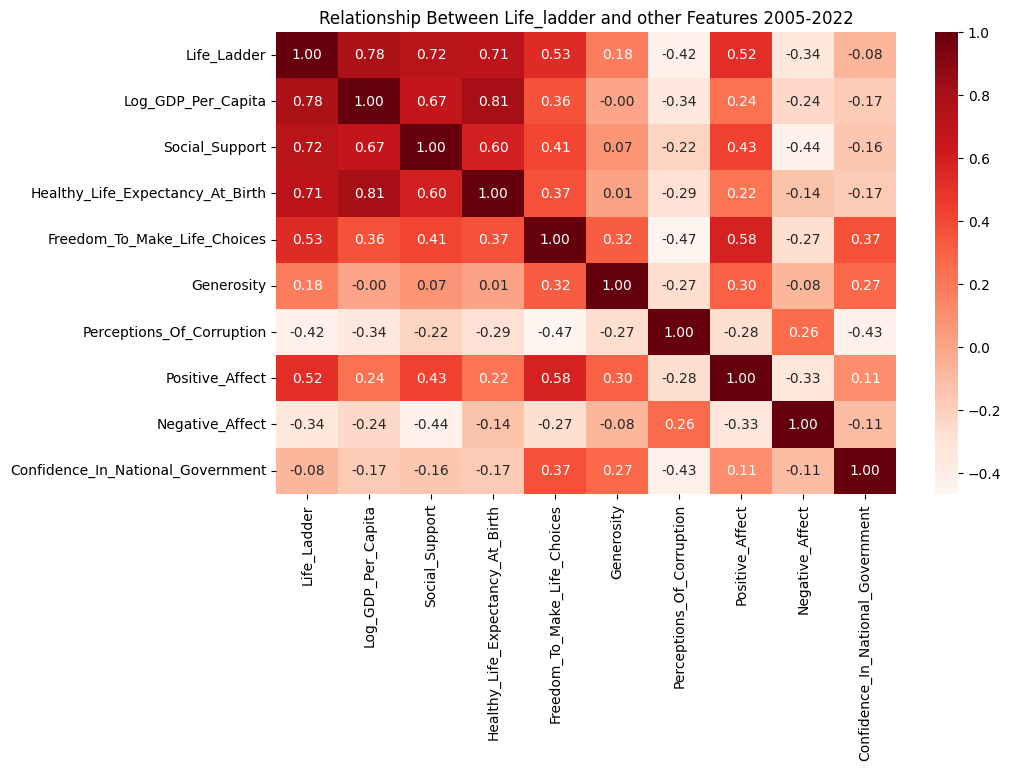

In [ ]:
#Chọn các cột kiểu số
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Điền các giá trị null bằng trung bình của cột tương ứng
numeric_data_filled = numeric_data.fillna(numeric_data.mean())

# Loại bỏ cột 'Year' khỏi dữ liệu số vì cột này không có ý nghĩa trong việc tìm hiểu mối quan hệ giữa các biến trong biểu đồ heatmap.
numeric_data_no_year = numeric_data_filled.drop(columns=['Year'])

# Vẽ biểu đồ heatmap cho các biến còn lại theo 'Life_Ladder'
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data_no_year.corr(), annot=True, fmt=".2f", cmap='Reds')
plt.title("Relationship Between Life_ladder and other Features 2005-2022")
plt.show()



2.   Relationship between Life ladder & other feature in 2022



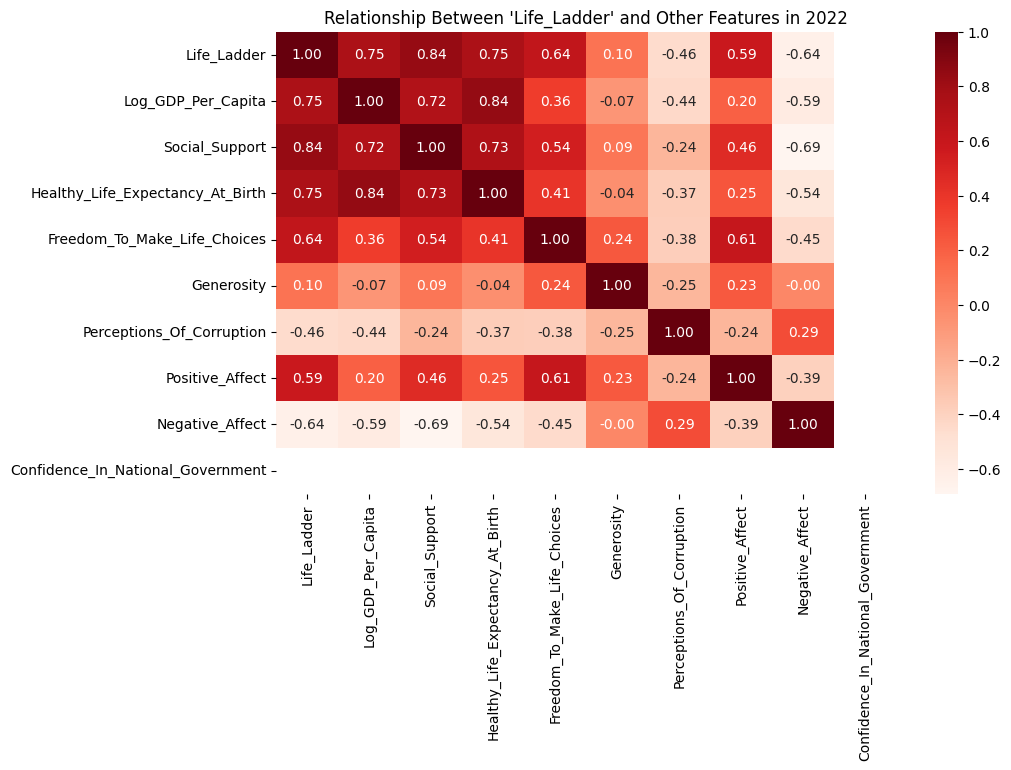

In [ ]:
# Biểu đồ mối quan hệ giữa Life_ladder với các yếu tố khác trong năm 2022
# Lọc dữ liệu cho năm 2022
data_2022 = data[data['Year'] == 2022]

# Chọn các cột kiểu số
numeric_data = data_2022.select_dtypes(include=['float64', 'int64'])

# Điền các giá trị null bằng trung bình của cột tương ứng
numeric_data_filled = numeric_data.fillna(numeric_data.mean())

# Loại bỏ cột 'Year' khỏi dữ liệu số vì cột này không có ý nghĩa trong việc tìm hiểu mối quan hệ giữa các biến trong biểu đồ heatmap.
numeric_data_no_year = numeric_data_filled.drop(columns=['Year'])

# Vẽ biểu đồ heatmap cho các biến còn lại theo 'Life_Ladder'
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data_no_year.corr(), annot=True, fmt=".2f", cmap='Reds')
plt.title("Relationship Between 'Life_Ladder' and Other Features in 2022")
plt.show()



3.   Life Ladder by Countries



In [ ]:
fig = px.choropleth(data.sort_values("Year"),
                    locations="Country_Name",
                    color="Life_Ladder",
                    locationmode="country names",
                    template="plotly_white",
                    color_continuous_scale='Reds',
                    animation_frame="Year")
fig.update_layout(
    title="Life Ladder Comparison by Countries",
    width=1000,  # chiều rộng của biểu đồ
    height=800  # chiều cao của biểu đồ
)
fig.show()



4.   Highest Perceptions Of Corruption (2022) according to Country




In [ ]:
#Tạo dataframe
data_corrup = data_2022[['Country_Name','Regional_Indicator', 'Perceptions_Of_Corruption']]
# Loại bỏ data NA
data_corrup = data_corrup.dropna()

# Vẽ biểu đồ
cor_2022 = pd.DataFrame(data_corrup.groupby('Country_Name')[['Country_Name','Perceptions_Of_Corruption']].mean().sort_values('Perceptions_Of_Corruption', ascending=False).round(2).head(10))
fig = px.bar(cor_2022, x = cor_2022.index, y = 'Perceptions_Of_Corruption',
            title = 'highest Perceptions Of Corruption (2022) according to Country', template = 'seaborn', color = cor_2022.index, text = 'Perceptions_Of_Corruption')
fig.show()
cor_2022

,Perceptions_Of_Corruption
Country_Name,
Bulgaria,0.94
Romania,0.94
North Macedonia,0.94
Jamaica,0.91
Ghana,0.91
Tunisia,0.91
Portugal,0.89
Cyprus,0.89
Panama,0.89




5.    Lowest Perceptions Of Corruption (2022) according to Country


In [ ]:
cor_2022 = pd.DataFrame(data_corrup.groupby('Country_Name')[['Country_Name','Perceptions_Of_Corruption']].mean().sort_values('Perceptions_Of_Corruption', ascending=True).round(2).head(10))
fig = px.bar(cor_2022, x = cor_2022.index, y = 'Perceptions_Of_Corruption',
            title = 'lowest Perceptions Of Corruption (2022) according to Country', template = 'seaborn', color = cor_2022.index, text = 'Perceptions_Of_Corruption')
fig.show()
cor_2022

,Perceptions_Of_Corruption
Country_Name,
Finland,0.19
Denmark,0.20
Sweden,0.21
Switzerland,0.23
New Zealand,0.28
Norway,0.31
Luxembourg,0.35
Ireland,0.36
Estonia,0.39




6.   Average Value by Category




In [ ]:
average_life_ladder = data_2022['Life_Ladder'].mean()
data_2022['Life_Ladder_Status'] = data_2022['Life_Ladder'].apply(lambda x: 'Above Average' if x > average_life_ladder else 'Below Average')

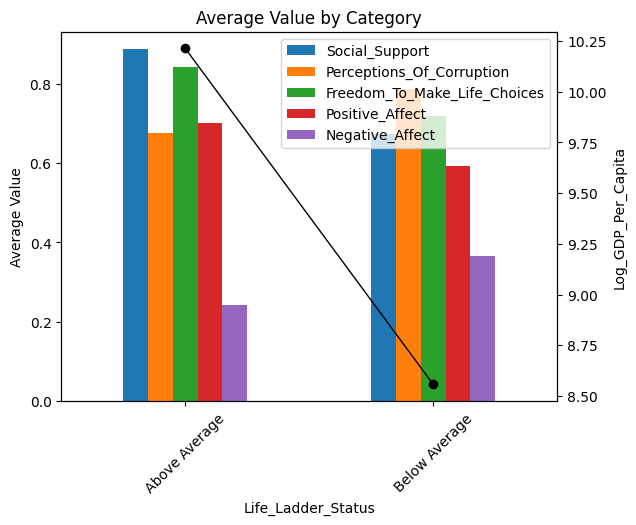

In [ ]:
# Group the DataFrame by the 'Life_Ladder_Status' column and calculate the average for each group
category_averages = data_2022.groupby('Life_Ladder_Status')[['Social_Support','Perceptions_Of_Corruption', 'Freedom_To_Make_Life_Choices', 'Positive_Affect', 'Negative_Affect','Log_GDP_Per_Capita']].mean()

# Plot the averages
fig, ax1 = plt.subplots()

# Bar plot for other columns
category_averages.drop('Log_GDP_Per_Capita', axis=1).plot(kind='bar', ax=ax1, title='Average Value by Category', ylabel='Average Value', rot=45)


ax2 = ax1.twinx()  # Create secondary y-axis
category_averages['Log_GDP_Per_Capita'].plot(kind='line', ax=ax2, color='black', marker='o', linewidth=1, label='Log_GDP_Per_Capita')
ax2.set_ylabel('Log_GDP_Per_Capita')

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')